# Classification d'images de panneaux de signalisation routière.

**Note** : La distinction entre les différents niveaux de titres n'est pas très visible au sein du texte (entre un h2 et un h3, on ne voit pas beaucoup la différence...). La table des matières à gauche sera votre amie !

## Introduction

### Description du projet

Dans ce projet, on s'intéresse à la reconnaissance de panneaux de signalisations (européens).

La [convention de Vienne sur les panneaux routiers](https://unece.org/DAM/trans/conventn/Conv_road_signs_2006v_EN.pdf) fixe leur classification en catégories / sous-catégories.

Rassurez-vous, lire 200 pages sur le sujet n'est nullement nécessaire puisque l'on peut retrouver un résumé de cette classification [juste ici](https://commons.wikimedia.org/wiki/User:Fry1989/Gallery/Road_Signs/Vienna_Convention_on_Road_Signs_and_Signals).

<br>

---------------

<br>

Bien sûr, afin d'avoir des temps de calcul raisonables (ainsi qu'une base de données assez fournie), nous avons modéré nos ambitions en nous limitant à l'étude des panneaux suivants :

<br>

| Catégorie | Sous-Catégorie | Panneau | Symbole |
| --------- | -------------- | ------- | ------- |
| A: Danger warning signs | A1: DANGEROUS BENDS | A1-1a: Curve to the left | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Vienna_Convention_road_sign_Aa-1a-V1.svg/1024px-Vienna_Convention_road_sign_Aa-1a-V1.svg.png" width="50"/> |
| A: Danger warning signs | A1: DANGEROUS BENDS | A1-1c: Double curve, or a series of curves, the first to the left | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Vienna_Convention_road_sign_Aa-1c-V1.svg/1024px-Vienna_Convention_road_sign_Aa-1c-V1.svg.png" width="50"/> |
| A: Danger warning signs | A4: CARRIAGEWAY NARROWS | A1-4a: Carriageway narrows | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Vienna_Convention_road_sign_Aa-4a-V1.svg/1024px-Vienna_Convention_road_sign_Aa-4a-V1.svg.png" width="50"/> |
| A: Danger warning signs | A7: UNEVEN ROAD | A1-7a: Uneven road | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Vienna_Convention_road_sign_Aa-7a-V1.svg/1024px-Vienna_Convention_road_sign_Aa-7a-V1.svg.png" width="50"/> |
| A: Danger warning signs | A7: UNEVEN ROAD | A1-7b: Bump | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Vienna_Convention_road_sign_Aa-7b-V1.svg/1024px-Vienna_Convention_road_sign_Aa-7b-V1.svg.png" width="50"/> |
| B: Priority signs | B1: GIVE WAY | B1: Give way / Yield | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Vienna_Convention_road_sign_B1-V1.svg/1024px-Vienna_Convention_road_sign_B1-V1.svg.png" width="50"/> |
| B: Priority signs | B2: STOP | B2a: Halt / Stop | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/800px-Vienna_Convention_road_sign_B2a.svg.png" width="50"/> |
| B: Priority signs | B3: PRIORITY ROAD | B3: Priority Road | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Vienna_Convention_road_sign_B3-V1.svg/180px-Vienna_Convention_road_sign_B3-V1.svg.png" width="50"/> |
| C: Prohibitory or restrictive signs | C1: NO ENTRY | C1a: No entry | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Vienna_Convention_road_sign_C1a-V1.svg/800px-Vienna_Convention_road_sign_C1a-V1.svg.png" width="50"/> |
| C: Prohibitory or restrictive signs | C13: OVERTAKING PROHIBITED | C13aa: Overtaking prohibited for all vehicles | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Vienna_Convention_road_sign_C13aa-V1.svg/800px-Vienna_Convention_road_sign_C13aa-V1.svg.png" width="50"/> |
| C: Prohibitory or restrictive signs | C14: MAXIMUM SPEED LIMIT | C14-50: Maximum speed limit 50 km/h | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Vienna_Convention_road_sign_C14-V1-50.svg/800px-Vienna_Convention_road_sign_C14-V1-50.svg.png" width="50"/> |
| C: Prohibitory or restrictive signs | C14: MAXIMUM SPEED LIMIT | C14-80: Maximum speed limit 80 km/h | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Vienna_Convention_road_sign_C14-V1-80.svg/180px-Vienna_Convention_road_sign_C14-V1-80.svg.png" width="50"/> |
| C: Prohibitory or restrictive signs | C14: MAXIMUM SPEED LIMIT | C14-100: Maximum speed limit 100 km/h | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Vienna_Convention_road_sign_C14-V1-100.svg/180px-Vienna_Convention_road_sign_C14-V1-100.svg.png" width="50"/> |
| D: Mandatory signs | D1: MANDATORY DIRECTION | D1-V1: Mandatory direction front | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Vienna_Convention_road_sign_D1a-V1.svg/800px-Vienna_Convention_road_sign_D1a-V1.svg.png" width="50"/> |
| D: Mandatory signs | D1: MANDATORY DIRECTION | D1-V3: Mandatory direction right | <img src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Vienna_Convention_road_sign_D1a-V3.svg" width="50"/> |
| D: Mandatory signs | D1: MANDATORY DIRECTION | D1-V7: Mandatory direction front-right | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Vienna_Convention_road_sign_D1a-V7.svg/800px-Vienna_Convention_road_sign_D1a-V7.svg.png" width="50"/> |
| E: Special regulation signs | E7: BEGINNING OF A BUILT-UP AREA | E7-V1: Beginning of a built-up area | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Vienna_Convention_road_sign_E7a-V1.svg/180px-Vienna_Convention_road_sign_E7a-V1.svg.png" width="50"/> |
| H: Additional panels | H1: DISTANCE TO | H1: Distance to | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Vienna_Convention_road_sign_H1-V1-1.svg/180px-Vienna_Convention_road_sign_H1-V1-1.svg.png" width="50"/> |


### But et premières intuitions


Le but sera dans un premier temps d'essayer de classifier chaque panneau. Comme nos premiers essais (sur un autre jeu de panneaux) paraissaient concluants, nous avons ajouté des "pièges" dans celui que nous utilisons ici (notez les deux panneaux de limitation de vitesse, ainsi que les deux obligations de direction qui sont très ressemblants). On s'attend donc à ce que notre réseau ait un peu plus de mal sur ces panneaux. Par contre, il ne devrait pas avoir trop de mal sur les autres.

Puis, dans un deuxième temps, nous essaierons de créer un réseau à plusieurs sorties qui permette de donner la catégorie / sous-catégorie du panneau (en plus de son nom).

### Chargement des dépendances

In [ ]:
# Calcul algébrique
import numpy as np

# Gestion de fichier
import os

# Graphiques
import matplotlib.pyplot as plt

# Apprentissage profond
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
import tensorflow as tf

# Pré-traitements
from keras.preprocessing.image import ImageDataGenerator

# Traitement d'images
import PIL
from PIL import Image

## Données

Premier obstacle ici : il s'avère assez fastidieux de faire un dataset d'images de panneaux de signalisation. En effet, là où d'autres sujets permettent de générer automatiquement des données d'apprentissage, ici la tâche est plus complexe.

Il existe cependant des datasets tout "prêts" ([GTSRB](https://benchmark.ini.rub.de/index.html), [MASTIF](http://www.zemris.fer.hr/~ssegvic/mastif/datasets.shtml)...), mais ils sont souvent composés d'images tirées de vidéos : on se retrouve alors avec une base de données déjà "augmentée", puisqu'un même panneau est parfois pris sous 30 angles de vue !

Notre base finale est un regroupement d'images trouvées sur des moteurs de recherches et glânées ça et là dans quelques datasets (en faisant attention à ne prendre qu'une seule prise de vue, quitte à ré-augmenter après). Elle est constituée (au moment où nous écrivons ces lignes) d'environ 50 images par classes, ce qui nous fait un total d'un peu plus de 500 images. Cependant, comme l'augmentation d'image semble bien adaptée ici (les panneaux peuvent être pris de travers, sous des luminosités différentes, etc...) nous pourrons augmenter artificiellement la taille de cette base (et dépasser largement les 1000 données requises).

###Chargement de base de données

In [ ]:
#!git clone https://github.com/hugopb82/traffic_signs.git
!git clone https://github.com/houda99-hd/projet-apprentissage-profond.git

Cloning into 'projet-apprentissage-profond'...
remote: Enumerating objects: 2274, done.
remote: Counting objects: 100% (2274/2274), done.
remote: Compressing objects: 100% (2208/2208), done.
remote: Total 2274 (delta 54), reused 2170 (delta 37), pack-reused 0
Receiving objects: 100% (2274/2274), 76.93 MiB | 19.80 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
# Au cas où il faille refaire un git clone (ouais, c'est pas très propre, mais bon../)
!rm -rf projet-apprentissage-profond/

In [ ]:
def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

In [ ]:
## Chargement des données
path = "projet-apprentissage-profond/projet/Dataset"
labels = [
    'Priorite/cedez_passage',
    'Priorite/STOP',
    'Priorite/route_prioritaire',
    'Interdiction/sens_interdit',
    'Interdiction/limit_50',
    'Interdiction/limit_80',
    'Interdiction/limit_100',
    'Interdiction/depassement',
    'Obligation/toutdroit',
    'Obligation/droite',
    'Obligation/toutdroit_droite',
    'Information/entree_agglo',
    'Information/distance_danger',
    'Danger/chaussee_retrecie',
    'Danger/virage_gauche',
    'Danger/double_virage_gauche',
    'Danger/ralentisseur',
    'Danger/double_ralentisseur',
]

x, y = load_data(path, labels, dataset='', image_size=64)
x.astype("float32")
print("Taille des données :", x.shape, y.shape)

# On les mélange (bien pour la split-validation)
indices = np.arange(len(y))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

# On encode les labels en one-shot
y_oh = keras.utils.to_categorical(y, len(labels))


# On sépare les données en train / test
nb_test = 200
x_train = x[:-nb_test]
y_train = y_oh[:-nb_test]
print("Taille des données d'apprentissage :", x_train.shape, y_train.shape)

x_test = x[-nb_test:]
y_test = y_oh[-nb_test:]
print("Taille des données de test :", x_test.shape, y_test.shape)

Taille des données : (1092, 64, 64, 3) (1092, 1)
Taille des données d'apprentissage : (892, 64, 64, 3) (892, 18)
Taille des données de test : (200, 64, 64, 3) (200, 18)


### Visualisation des images

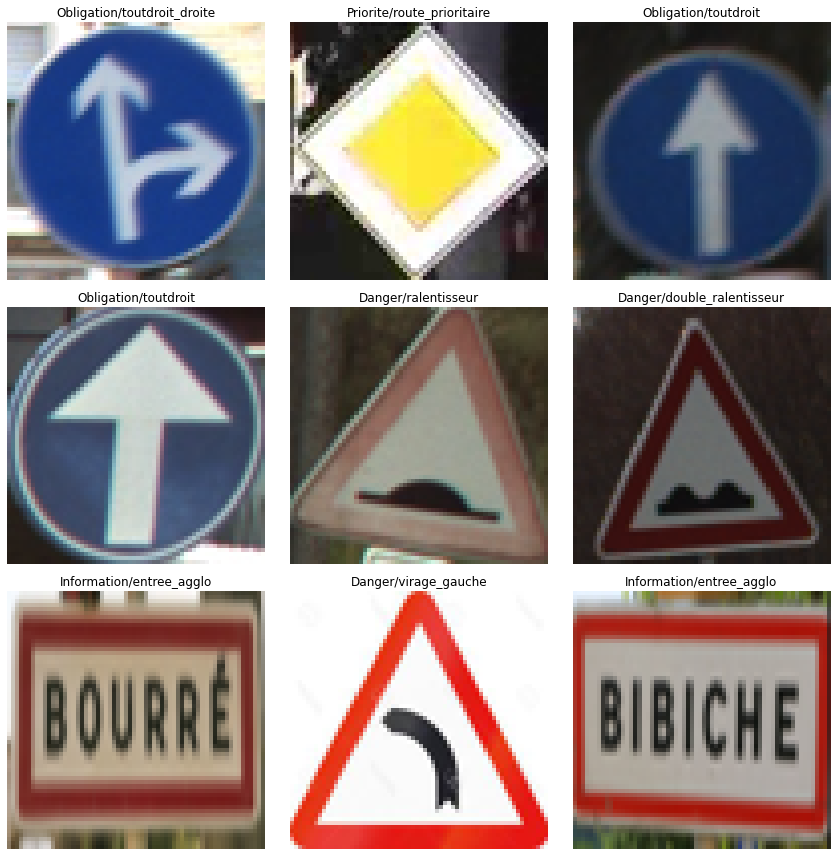

In [ ]:
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(len(x))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    image = x[shuffle_indices[i]]
    plt.title(labels[int(y[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Répartition des images dans les différentes classes')

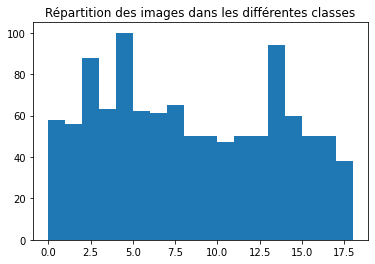

In [ ]:
plt.hist(y, bins=range(len(labels)+1))
plt.title('Répartition des images dans les différentes classes')

## Pré-traitements

Ici, nous allons faire plusieurs choses :

1. Normaliser les données
2. Les centrer
3. Les réduire

In [ ]:
# Normalisation (0-255 -> 0-1)
x_train_n = x_train / 255
x_test_n = x_test / 255

# Centrage (?)
mean = x_train.mean(axis=(0,1,2), keepdims=True)
x_train_n = x_train - mean
x_test_n = x_test - mean
print("Moyenne, canal par canal :", np.round(x_train_n.mean(axis=(0,1,2)),5))
print("Moyenne, canal par canal :", np.round(x_test_n.mean(axis=(0,1,2)),5))

# Standardisation
std = x_train.std(axis=(0,1,2), keepdims=True)
x_train_n = x_train / std
x_test_n = x_test / std
print("Variance, canal par canal :", x_train_n.std(axis=(0,1,2)))
print("Variance, canal par canal :", x_test_n.std(axis=(0,1,2)))

Moyenne, canal par canal : [0. 0. 0.]
Moyenne, canal par canal : [6.11318 7.45788 8.51839]
Variance, canal par canal : [1. 1. 1.]
Variance, canal par canal : [1.00716332 1.02874315 1.0392092 ]


## Premier réseau

On cherche ici à construire un réseau simpliste, qui permette de bien apprendre les données d'apprentissage (s'il sur-apprend... tant mieux... pour le moment !)


### Définition

In [ ]:
# Premier réseau... Très simple !

model = Sequential()
model.add(Conv2D(
    filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 3)
));
model.add(MaxPooling2D());
          
model.add(Conv2D(
    filters = 64, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());

model.add(Conv2D(
    filters = 96, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());

model.add(Conv2D(
    filters = 128, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());

model.add(Flatten());
model.add(Dense(512, activation='relu'));
model.add(Dense(len(labels), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

### Entraînement


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
history = model.fit(x_train_n, y_train, validation_split=0.2, epochs=30)

Epoch 1/30
23/23 [==============================] - 31s 55ms/step - loss: 2.8395 - acc: 0.0949 - val_loss: 2.2552 - val_acc: 0.3408
Epoch 2/30
23/23 [==============================] - 0s 17ms/step - loss: 2.0495 - acc: 0.3686 - val_loss: 1.3467 - val_acc: 0.6145
Epoch 3/30
23/23 [==============================] - 0s 17ms/step - loss: 1.1224 - acc: 0.6636 - val_loss: 0.9095 - val_acc: 0.6872
Epoch 4/30
23/23 [==============================] - 0s 17ms/step - loss: 0.7306 - acc: 0.7634 - val_loss: 0.5586 - val_acc: 0.8436
Epoch 5/30
23/23 [==============================] - 0s 17ms/step - loss: 0.4487 - acc: 0.8712 - val_loss: 0.5326 - val_acc: 0.8771
Epoch 6/30
23/23 [==============================] - 0s 17ms/step - loss: 0.2753 - acc: 0.9232 - val_loss: 0.8098 - val_acc: 0.8156
Epoch 7/30
23/23 [==============================] - 0s 16ms/step - loss: 0.4025 - acc: 0.8991 - val_loss: 0.4847 - val_acc: 0.8547
Epoch 8/30
23/23 [==============================] - 0s 17ms/step - loss: 0.1989 - 

### Analyse des résultats

In [ ]:
def plot_training_analysis(val = False):
  acc = history.history['acc']
  loss = history.history['loss']
  
  if val:
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  if val:
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  if val:
    plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

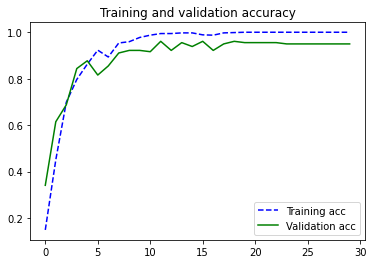

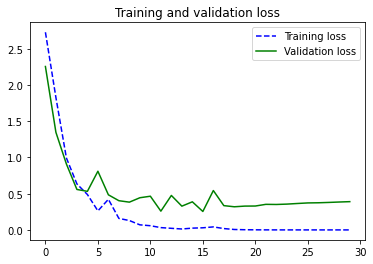

In [ ]:
plot_training_analysis(True)

In [ ]:
print("Résultats sur les données de test")
results = model.evaluate(x_test_n, y_test)
print("test loss, test acc:", results)

Résultats sur les données de test
7/7 [==============================] - 0s 19ms/step - loss: 0.2065 - acc: 0.9700
test loss, test acc: [0.20648635923862457, 0.9700000286102295]


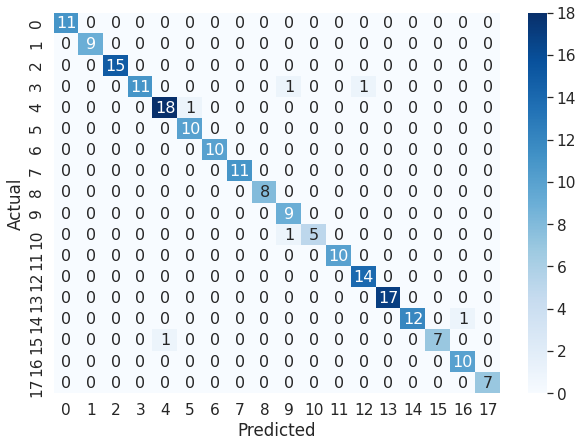

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test_n)
y_pred = np.argmax(y_pred, axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Peut-on faire mieux ?

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 96)        55392     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 9, 9, 128)        

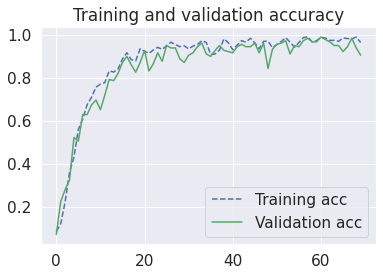

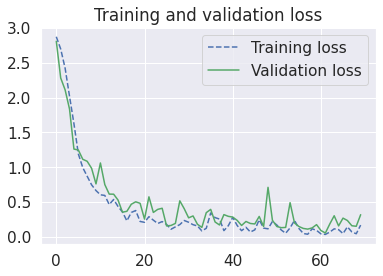

In [ ]:
# Ajustement du réseau

model = Sequential()
#1ere couche CN 5*5
model.add(Conv2D(
    filters = 32, kernel_size = 5, activation = 'relu', input_shape = (64, 64, 3)
));
#2eme cn 3*3 +maxpooling 
model.add(Conv2D(
    filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 3)
));
model.add(MaxPooling2D());

#3eme cn 3*3 +maxpooling        
model.add(Conv2D(
    filters = 64, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());
#4eme couche cn 3*3 
model.add(Conv2D(
    filters = 96, kernel_size = 3, activation = 'relu'
));
#5eme couche cn 3*3
model.add(Conv2D(
    filters = 128, kernel_size = 3, activation = 'relu'
));
#6eme couche cn 3*3 maxpool
model.add(Conv2D(
    filters = 256, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());
model.add(tf.keras.layers.Dropout(0.5))
model.add(Flatten());
#3 connected layers
model.add(Dense(512, activation='relu'));
model.add(Dense(1024, activation='relu'));
model.add(Dense(len(labels), activation='softmax'))

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

# history = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=15)
# history = model.fit_generator(train_generator, validation_data = validation_generator, epochs = 50)
batch_size = 64
# history = model.fit(
#     train_generator,
#     steps_per_epoch = len(x_train) / batch_size,
#     # validation_data = validation_generator, 
#     # validation_steps = len(x_val) / batch_size,
#     epochs=80
# )

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(x_train)*.8 / 32,
    epochs=70
)

plot_training_analysis(True)

In [ ]:
print("Résultats sur les données de test")
results = model.evaluate(x_test_n, y_test)
print("test loss, test acc:", results)

Résultats sur les données de test
7/7 [==============================] - 0s 12ms/step - loss: 0.2588 - acc: 0.9300
test loss, test acc: [0.2588220536708832, 0.9300000071525574]


## Augmentation des données

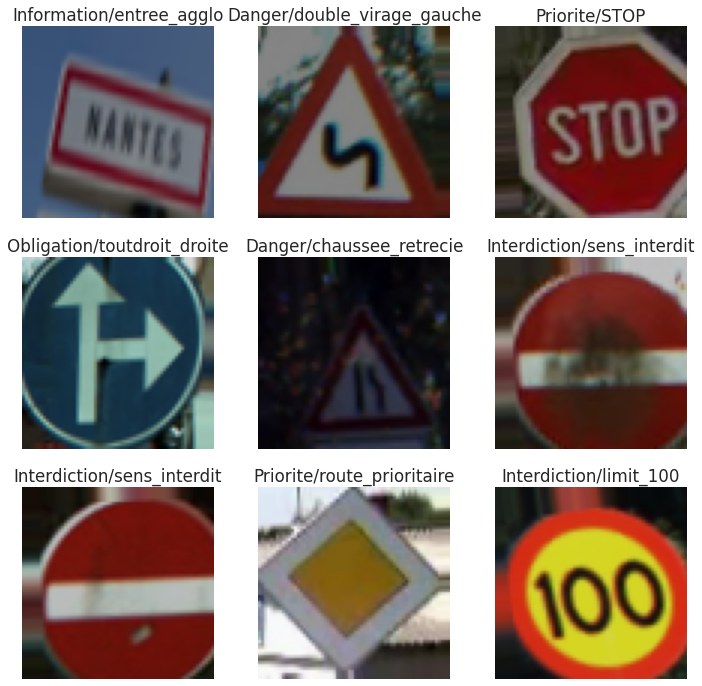

In [ ]:
datagen_visible = ImageDataGenerator(   
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.0,
    brightness_range=[0.4,1.0],
    fill_mode='nearest',
    validation_split=0.2
)

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    featurewise_center=True,
    featurewise_std_normalization=True,
    
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.0,
    brightness_range=[0.4,1.0],
    fill_mode='nearest',
    validation_split=0.2
)

train_datagen.fit(x_train)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32, subset='training')
validation_generator = train_datagen.flow(x_train, y_train, batch_size=8, subset='validation')

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    featurewise_center=True,
    featurewise_std_normalization=True,
)
test_datagen.mean = train_datagen.mean
test_datagen.std = train_datagen.std

plt.figure(figsize=(12, 12))
for x_batch, y_batch in datagen_visible.flow(x, y, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(64, 64, 3)/255)
        plt.title(labels[int(y_batch[i])])
    plt.show()
    break

## Deuxième réseau

### Définition

In [ ]:
# Ajustement du réseau

model = Sequential()
#1ere couche CN 5*5
model.add(Conv2D(
    filters = 32, kernel_size = 5, activation = 'relu', input_shape = (64, 64, 3)
));
#2eme cn 3*3 +maxpooling 
model.add(Conv2D(
    filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 3)
));
model.add(MaxPooling2D());

#3eme cn 3*3 +maxpooling        
model.add(Conv2D(
    filters = 64, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());
#4eme couche cn 3*3 
model.add(Conv2D(
    filters = 96, kernel_size = 3, activation = 'relu'
));
#5eme couche cn 3*3
model.add(Conv2D(
    filters = 128, kernel_size = 3, activation = 'relu'
));
#6eme couche cn 3*3 maxpool
model.add(Conv2D(
    filters = 256, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());
#model.add(tf.keras.layers.Dropout(0.8))
model.add(Flatten());
#3 connected layers
model.add(Dense(512, activation='relu'));
model.add(Dense(1024, activation='relu'));
model.add(Dense(len(labels), activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 11, 11, 96)        55392     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 9, 9, 128)       

### Entraînement


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
# history = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=15)
# history = model.fit_generator(train_generator, validation_data = validation_generator, epochs = 50)
batch_size = 64
# history = model.fit(
#     train_generator,
#     steps_per_epoch = len(x_train) / batch_size,
#     # validation_data = validation_generator, 
#     # validation_steps = len(x_val) / batch_size,
#     epochs=80
# )

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(x_train)*.8 / 32,
    epochs=70
)

Epoch 1/70
22/22 [==============================] - 3s 103ms/step - loss: 2.8750 - acc: 0.0848 - val_loss: 2.7852 - val_acc: 0.1404
Epoch 2/70
22/22 [==============================] - 2s 93ms/step - loss: 2.6875 - acc: 0.1124 - val_loss: 2.3084 - val_acc: 0.2865
Epoch 3/70
22/22 [==============================] - 2s 92ms/step - loss: 2.0375 - acc: 0.3516 - val_loss: 1.5245 - val_acc: 0.4831
Epoch 4/70
22/22 [==============================] - 2s 93ms/step - loss: 1.3944 - acc: 0.5022 - val_loss: 1.2966 - val_acc: 0.5000
Epoch 5/70
22/22 [==============================] - 2s 95ms/step - loss: 1.2340 - acc: 0.5381 - val_loss: 1.0703 - val_acc: 0.6292
Epoch 6/70
22/22 [==============================] - 2s 92ms/step - loss: 1.0112 - acc: 0.6424 - val_loss: 0.9275 - val_acc: 0.6517
Epoch 7/70
22/22 [==============================] - 2s 91ms/step - loss: 0.7294 - acc: 0.7119 - val_loss: 0.6236 - val_acc: 0.7921
Epoch 8/70
22/22 [==============================] - 2s 91ms/step - loss: 0.5305 - 

### Analyse des résultats

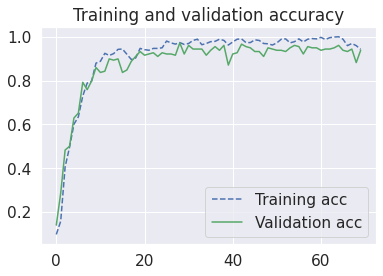

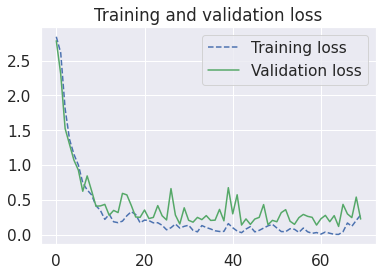

In [ ]:
plot_training_analysis(True)

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_datagen.flow(x_test, y_test))
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 0s 13ms/step - loss: 0.1428 - acc: 0.9600
test loss, test acc: [0.142821803689003, 0.9599999785423279]


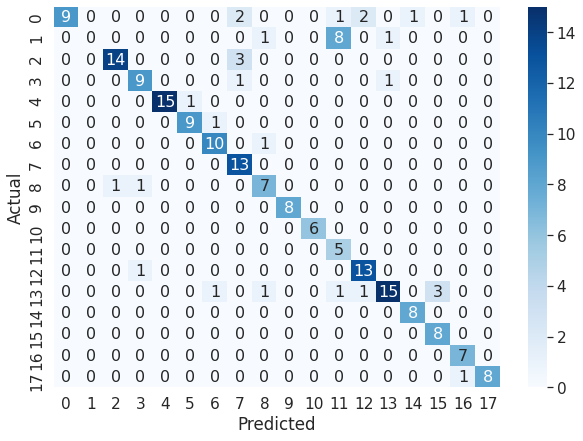

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Normalisation du réseau

In [ ]:
from sklearn.preprocessing import StandardScaler

x, y = load_data(path, labels, dataset='', image_size=64)

x.astype("float32")
print("Taille des données :", x.shape, y.shape)
scaler = StandardScaler()

print(x.mean())
print(x.std())

#flatten
taille = x.shape
x = Flatten()(x)

x = scaler.fit_transform(x)

print(x.mean())
print(x.std())


Taille des données : (1092, 64, 64, 3) (1092, 1)
111.24527786124466
77.9481670166096
5.422334674603939e-18
1.0000000000000002


### Visualisation des données normalisées

TypeError: ignored

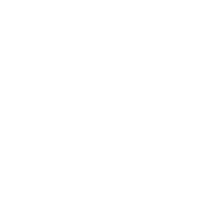

In [ ]:
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(len(x))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    image = x[shuffle_indices[i]].reshape(64, 64, 3)
    plt.title(labels[int(y[shuffle_indices[i]])])
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [ ]:
x = x.reshape(1092, 64, 64, 3);
y = keras.utils.to_categorical(y, len(labels))

#On les mélange (bien pour la split-validation)
indices = np.arange(len(y))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

nb_train = 600
nb_test = 200

x_train_normalise = x[:-nb_train]
y_train_normalise = y[:-nb_train]

print(x_train_normalise.shape)
print(y_train_normalise.shape)

x_valid_normalise = x[-nb_train:-nb_test]
y_valid_normalise = y[-nb_train:-nb_test]

print(x_valid_normalise.shape)
print(y_valid_normalise.shape)

x_test_normalise = x[-nb_test:]
y_test_normalise = y[-nb_test:]

print(x_test_normalise.shape)
print(y_test_normalise.shape)

(492, 64, 64, 3)
(492, 18)
(400, 64, 64, 3)
(400, 18)
(200, 64, 64, 3)
(200, 18)


### Troisième réseau

In [ ]:
from keras.layers import Dropout
# Ajustement du réseau

model = Sequential()
#1ere couche CN 5*5
model.add(Conv2D(
    filters = 32, kernel_size = 5, activation = 'relu', input_shape = (64, 64, 3)
));
#2eme cn 3*3 +maxpooling 
model.add(Conv2D(
    filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 3)
));
model.add(MaxPooling2D());

#3eme cn 3*3 +maxpooling        
model.add(Conv2D(
    filters = 64, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());
#4eme couche cn 3*3 
model.add(Conv2D(
    filters = 96, kernel_size = 3, activation = 'relu'
));
#5eme couche cn 3*3
model.add(Conv2D(
    filters = 128, kernel_size = 3, activation = 'relu'
));
#6eme couche cn 3*3 maxpool
model.add(Conv2D(
    filters = 256, kernel_size = 3, activation = 'relu'
));
model.add(MaxPooling2D());
model.add(tf.keras.layers.Dropout(0.8))
model.add(Flatten());
#3 connected layers
model.add(Dense(512, activation='relu'));
model.add(Dense(1024, activation='relu'));
#model.add(Dropout(0.5)) # On utilise du DropOut sur cette couche dense car elle comporte un grand nombre
                               # de paramètres et risque d'être très sujette au sur-apprentissage.
model.add(Dense(len(labels), activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 11, 11, 96)        55392     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 9, 9, 128)       

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
history = model.fit(x_train_normalise,y_train_normalise, validation_data=(x_valid_normalise,y_valid_normalise), epochs=200)


Epoch 1/200
16/16 [==============================] - 2s 55ms/step - loss: 0.0684 - acc: 0.9957 - val_loss: 0.4501 - val_acc: 0.9550
Epoch 2/200
16/16 [==============================] - 1s 33ms/step - loss: 0.0494 - acc: 0.9975 - val_loss: 0.3751 - val_acc: 0.9650
Epoch 3/200
16/16 [==============================] - 1s 33ms/step - loss: 0.0197 - acc: 0.9925 - val_loss: 0.8195 - val_acc: 0.9525
Epoch 4/200
16/16 [==============================] - 1s 32ms/step - loss: 0.0022 - acc: 0.9991 - val_loss: 0.9756 - val_acc: 0.9600
Epoch 5/200
16/16 [==============================] - 1s 33ms/step - loss: 5.5074e-05 - acc: 1.0000 - val_loss: 1.0195 - val_acc: 0.9600
Epoch 6/200
16/16 [==============================] - 1s 33ms/step - loss: 9.3749e-05 - acc: 1.0000 - val_loss: 1.0699 - val_acc: 0.9575
Epoch 7/200
16/16 [==============================] - 1s 32ms/step - loss: 0.0745 - acc: 0.9974 - val_loss: 0.9263 - val_acc: 0.9600
Epoch 8/200
16/16 [==============================] - 1s 33ms/step - 

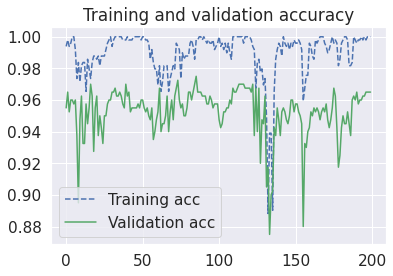

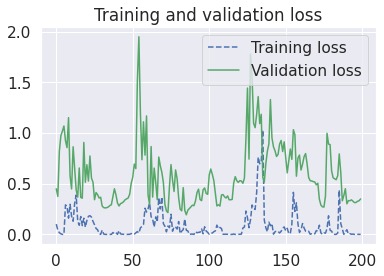

In [ ]:
plot_training_analysis(True)

In [ ]:
print("Résultats sur les données de test")
results = model.evaluate(x_test_normalise, y_test_normalise)
print("test loss, test acc:", results)

Résultats sur les données de test
7/7 [==============================] - 0s 11ms/step - loss: 0.0498 - acc: 0.9900
test loss, test acc: [0.04977006837725639, 0.9900000095367432]


## Régularisation l1 / l2

### Définition

In [ ]:
from keras import regularizers

In [ ]:
reg = 'l1_l2'
lambda1 = 1e-4
lambda2 = 1e-5

model = Sequential()
model.add(Conv2D(
    filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 3),kernel_regularizer=regularizers.l1_l2(l1=lambda1, l2=lambda2)
));
model.add(MaxPooling2D());
          
model.add(Conv2D(
    filters = 64, kernel_size = 3, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=lambda1, l2=lambda2)
));
model.add(MaxPooling2D());

model.add(Conv2D(
    filters = 96, kernel_size = 3, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=lambda1, l2=lambda2)
));
model.add(MaxPooling2D());

model.add(Conv2D(
    filters = 128, kernel_size = 3, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=lambda1, l2=lambda2)
));
model.add(MaxPooling2D());
model.add(tf.keras.layers.Dropout(0.5))

model.add(Flatten());
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=lambda1, l2=lambda2)));
model.add(Dense(len(labels), activation='softmax'))

### Entraînement

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(x_train)*.8 / 32,
    epochs=120
)
#history = model.fit(x_train_normalise,y_train_normalise, validation_data=(x_valid_normalise,y_valid_normalise), epochs=200)


Epoch 1/120
22/22 [==============================] - 3s 97ms/step - loss: 4.3813 - acc: 0.0847 - val_loss: 4.0589 - val_acc: 0.1517
Epoch 2/120
22/22 [==============================] - 2s 83ms/step - loss: 3.9351 - acc: 0.1335 - val_loss: 3.4420 - val_acc: 0.2360
Epoch 3/120
22/22 [==============================] - 2s 83ms/step - loss: 3.2053 - acc: 0.2850 - val_loss: 2.5745 - val_acc: 0.4719
Epoch 4/120
22/22 [==============================] - 2s 84ms/step - loss: 2.5239 - acc: 0.4597 - val_loss: 2.2014 - val_acc: 0.5730
Epoch 5/120
22/22 [==============================] - 2s 86ms/step - loss: 2.2025 - acc: 0.5425 - val_loss: 1.8960 - val_acc: 0.5730
Epoch 6/120
22/22 [==============================] - 2s 85ms/step - loss: 1.8517 - acc: 0.6308 - val_loss: 1.5660 - val_acc: 0.7528
Epoch 7/120
22/22 [==============================] - 2s 84ms/step - loss: 1.6700 - acc: 0.6688 - val_loss: 1.6805 - val_acc: 0.6798
Epoch 8/120
22/22 [==============================] - 2s 86ms/step - loss: 1.

### Analyse des résultats

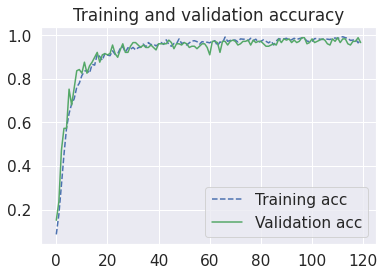

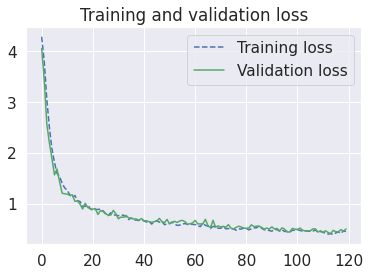

In [ ]:
plot_training_analysis(True)

In [ ]:
print("Evaluate on test data")
#results = model.evaluate(x_test_normalise, y_test_normalise)
results = model.evaluate(test_datagen.flow(x_test, y_test))
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 0s 8ms/step - loss: 0.4720 - acc: 0.9800
test loss, test acc: [0.47204989194869995, 0.9800000190734863]


### Matrice de confusion

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


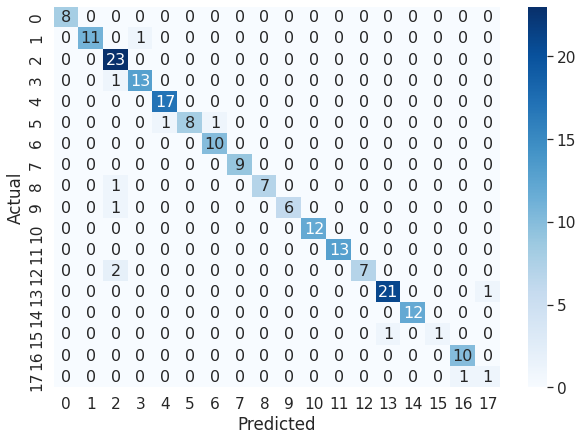

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

y_true = np.argmax( y_test_normalise, axis=1)
y_pred = model.predict_classes(x_test_normalise)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Prédiction de données (Cas Test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
This image most likely belongs to Danger/chaussee_retrecie 


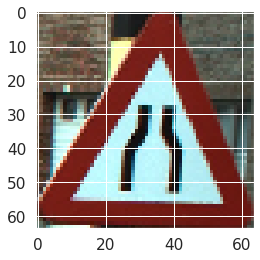

In [ ]:
image_url = "https://raw.githubusercontent.com/houda99-hd/projet-apprentissage-profond/master/projet/test/Danger/chaussee_retrecie/chaussee_retrecie_1.png"
image_path = tf.keras.utils.get_file('vit3', origin=image_url)

img_height = 64
img_width = 64

img = keras.preprocessing.image.load_img(
    image_path , target_size = (img_height,img_width)
)

plt.imshow(img)

input_arr = keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])  # Convert single image to a batch.


prediction = model.predict(input_arr)
# model.predict_proba(Xnew)


class_names = labels
score = tf.nn.softmax(prediction[0])
print(prediction)
print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)